In [1]:
#import necessary libraries
import pandas as pd
import numpy as np 
from sklearn import svm,datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier




In [2]:
#Training data
X_Train = np.array([[1.3, 3.3], [1.4, 2.5], [1.8, 2.8], [1.9, 3.1], [1.5, 1.5], [1.8, 2], [2.3, 1.9], [2.4, 1.4], [2.4, 2.4], [2.4, 3], [2.7, 2.7], [2.3, 3.2]])
Y_Train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])
#Testing  data
X_Test = np.array([[1.7, 2.5], [1.9, 2.7], [2, 2.15], [2.4, 2], [2.2, 3.25], [2.4, 2.25]])
Y_Test = np.array([0, 0, 1, 1, 2, 2])

## **SVM**

In [3]:
# creat svm model
clf= svm.SVC()
# Train the model
clf.fit(X_Train,Y_Train)
Y_Train_Pred=clf.predict(X_Train)
Y_Test_Pred=clf.predict(X_Test) 

In [4]:
# Get the confusion matrices for training and test datasets
train_confusion_matrix = confusion_matrix(Y_Train,Y_Train_Pred)
test_confusion_matrix = confusion_matrix(Y_Test,Y_Test_Pred)

In [5]:
# Print the confusion matrices
print("Training confusion matrix:")
print(train_confusion_matrix)
print("Test confusion matrix:")
print(test_confusion_matrix)

Training confusion matrix:
[[4 0 0]
 [0 4 0]
 [0 0 4]]
Test confusion matrix:
[[2 0 0]
 [0 2 0]
 [0 0 2]]


In [6]:
# Define a function to plot confusion matrices
def plot_confusion_matrix(confusion_matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

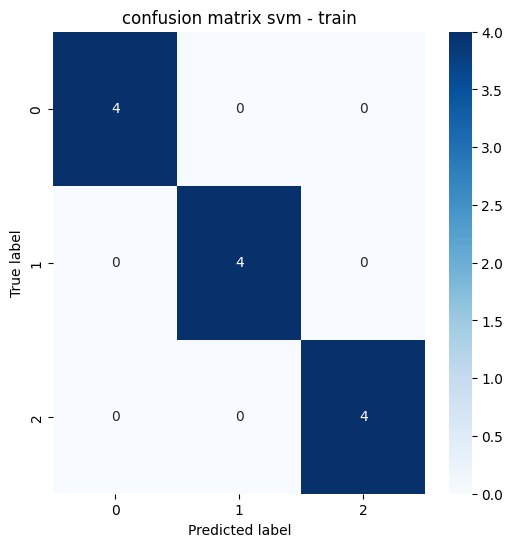

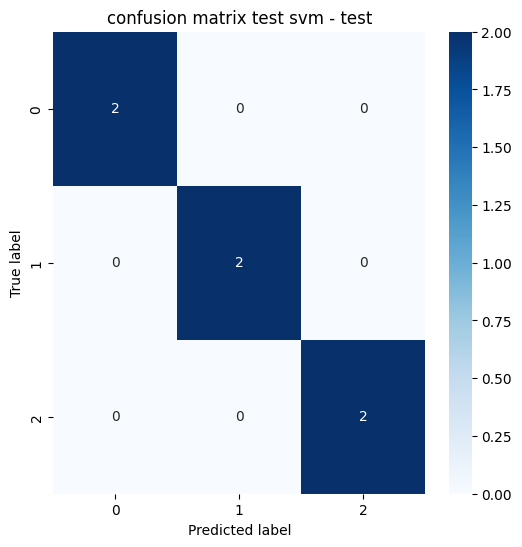

In [7]:
#ConfusionMatrixDisplay.from_estimator(clf, X_Train, Y_Train)
plot_confusion_matrix(train_confusion_matrix,'confusion matrix svm - train')
#ConfusionMatrixDisplay.from_estimator(clf, X_Test, Y_Test)
plot_confusion_matrix(test_confusion_matrix,'confusion matrix test svm - test')

In [8]:
def getAccuracy(model, x, y):
    return model.score(x,y)*100
    
print('Accuracy of train: {:.2f}%'.format(getAccuracy(clf, X_Train, Y_Train)))
print('Accuracy of test: {:.2f}%'.format(getAccuracy(clf, X_Test, Y_Test)))

Accuracy of train: 100.00%
Accuracy of test: 100.00%


In [9]:

# Define a function to plot the decision boundary and the data points
def plot_fun(clf,title):
    #plt.figure(figsize=(8, 6))
    h = 0.01
    x_min, x_max = X_Train[:, 0].min() - 0.5, X_Train[:, 0].max() + 0.5
    y_min, y_max = X_Train[:, 1].min() - 0.5, X_Train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    custom_cmap = plt.cm.colors.ListedColormap(['blue', 'red', 'orange'])
    plt.contourf(xx, yy, Z, alpha=0.8,cmap=custom_cmap)
    # Plot the training points
    plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, cmap=plt.cm.Paired, edgecolors='k', marker='o', label='Training Data')
    plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,  cmap=plt.cm.Paired, edgecolors='k', marker='x', label='Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.show()


<ipython-input-9-68192264c9e0>:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,  cmap=plt.cm.Paired, edgecolors='k', marker='x', label='Test Data')


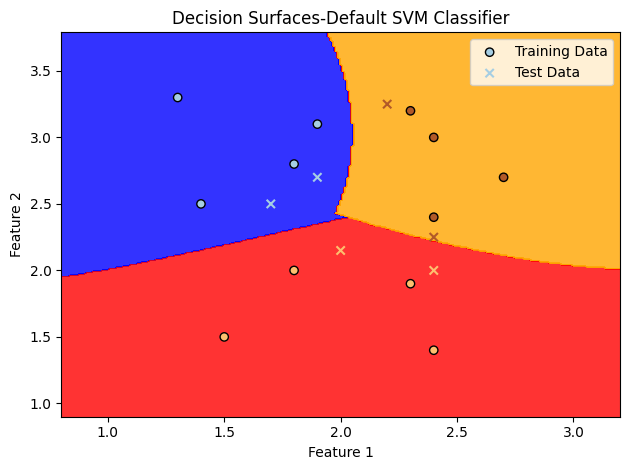

In [10]:
plot_fun(clf,'Decision Surfaces-Default SVM Classifier')

[[8 0]
 [2 2]]
[[4 0]
 [2 0]]


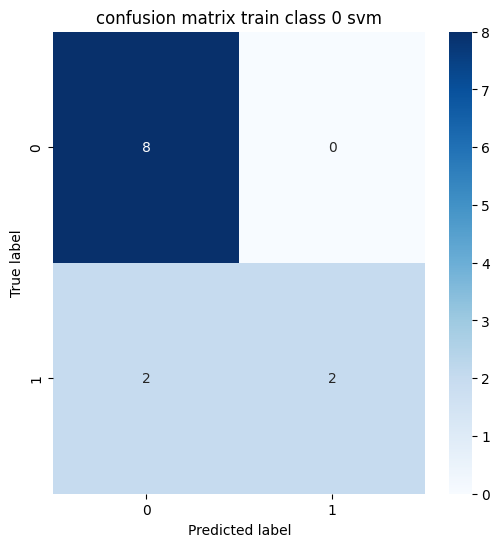

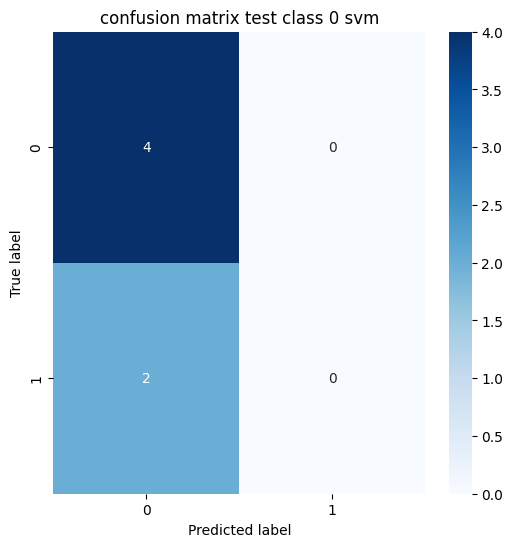

<ipython-input-9-68192264c9e0>:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,  cmap=plt.cm.Paired, edgecolors='k', marker='x', label='Test Data')


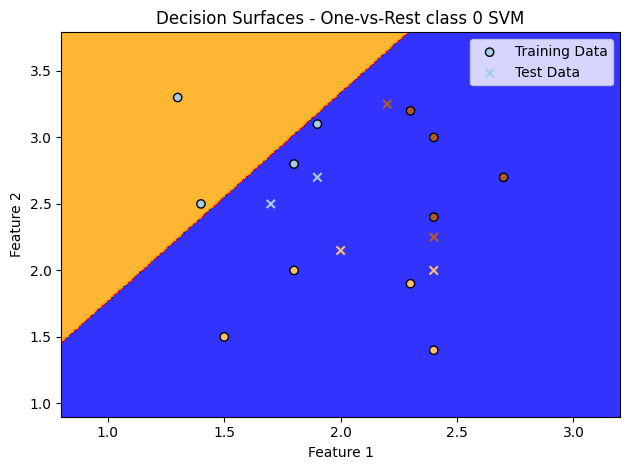

confusion matrix train class 0 svm: 83.33%
confusion matrix test class 0 svm: 66.67%


In [11]:

Y_Train_0 = np.where(Y_Train == 0, 1, 0)
Y_Train_1 = np.where(Y_Train == 1, 1, 0)
Y_Train_2 = np.where(Y_Train == 2, 1, 0)

Y_Test_0 = np.where(Y_Test == 0, 1, 0)
Y_Test_1 = np.where(Y_Test == 1, 1, 0)
Y_Test_2 = np.where(Y_Test == 2, 1, 0)


#Y_Train_0, Y_Test_0 = encode()
# Create and train the SVM classifier
svm_classifier_0=svm.SVC(kernel='linear')
svm_classifier_0.fit(X_Train, Y_Train_0)

# Obtain predictions for training and test datasets
Y_Train_pred_0 = svm_classifier_0.predict(X_Train)
Y_Test_pred_0 = svm_classifier_0.predict(X_Test)

train_0_confusion_matrix = confusion_matrix(Y_Train_0,Y_Train_pred_0)
test_0_confusion_matrix = confusion_matrix(Y_Test_0,Y_Test_pred_0)
print(train_0_confusion_matrix)
print(test_0_confusion_matrix)
plot_confusion_matrix(train_0_confusion_matrix,'confusion matrix train class 0 svm')
plot_confusion_matrix(test_0_confusion_matrix,'confusion matrix test class 0 svm')
plot_fun(svm_classifier_0,'Decision Surfaces - One-vs-Rest class 0 SVM')
print('confusion matrix train class 0 svm: {:.2f}%'.format(getAccuracy(svm_classifier_0, X_Train,Y_Train_0)))
print('confusion matrix test class 0 svm: {:.2f}%'.format(getAccuracy(svm_classifier_0, X_Test,Y_Test_0)))



[[8 0]
 [0 4]]
[[4 0]
 [1 1]]


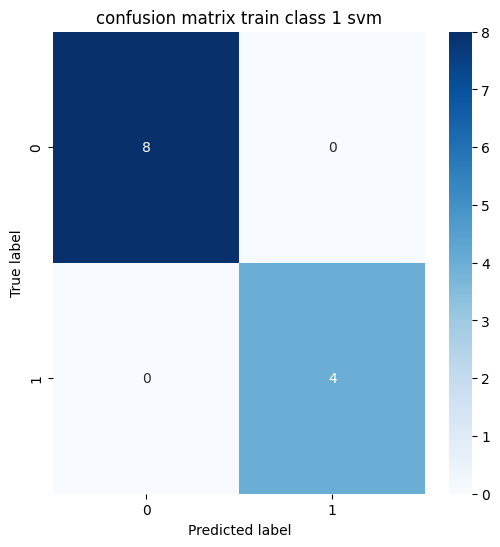

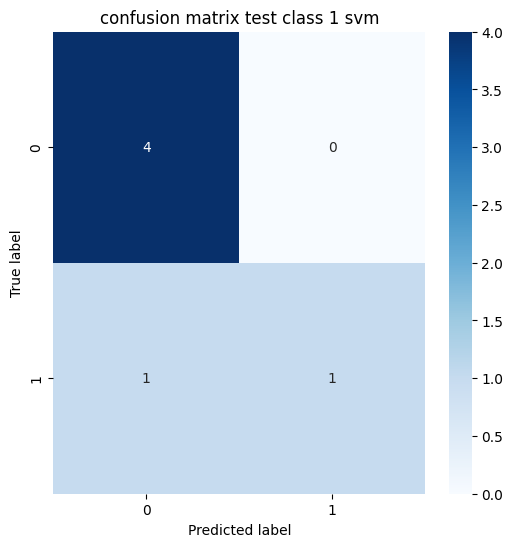

<ipython-input-9-68192264c9e0>:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,  cmap=plt.cm.Paired, edgecolors='k', marker='x', label='Test Data')


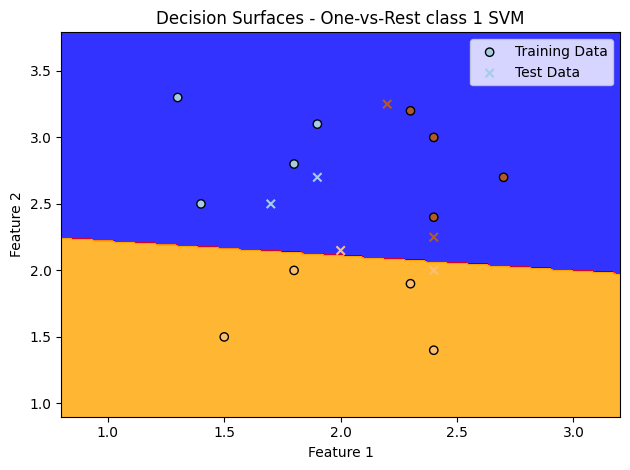

confusion matrix train class 1 svm: 100.00%
confusion matrix test class 1 svm: 83.33%


In [12]:
#Y_Train_1, Y_Test_1 = encode()

# Create and train the SVM classifier
svm_classifier_1=svm.SVC(kernel='linear')
svm_classifier_1.fit(X_Train, Y_Train_1)

    # Obtain predictions for training and test datasets
Y_Train_pred_1 = svm_classifier_1.predict(X_Train)
Y_Test_pred_1 = svm_classifier_1.predict(X_Test)

train_1_confusion_matrix = confusion_matrix(Y_Train_1,Y_Train_pred_1)
test_1_confusion_matrix = confusion_matrix(Y_Test_1,Y_Test_pred_1)
print(train_1_confusion_matrix)
print(test_1_confusion_matrix)
plot_confusion_matrix(train_1_confusion_matrix,'confusion matrix train class 1 svm')
plot_confusion_matrix(test_1_confusion_matrix,'confusion matrix test class 1 svm')
plot_fun(svm_classifier_1,'Decision Surfaces - One-vs-Rest class 1 SVM')
print('confusion matrix train class 1 svm: {:.2f}%'.format(getAccuracy(svm_classifier_1, X_Train,Y_Train_1)))
print('confusion matrix test class 1 svm: {:.2f}%'.format(getAccuracy(svm_classifier_1, X_Test,Y_Test_1)))
 

[[8 0]
 [0 4]]
[[4 0]
 [1 1]]


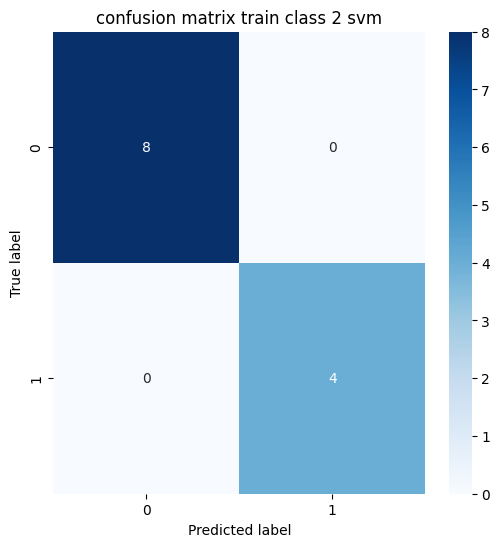

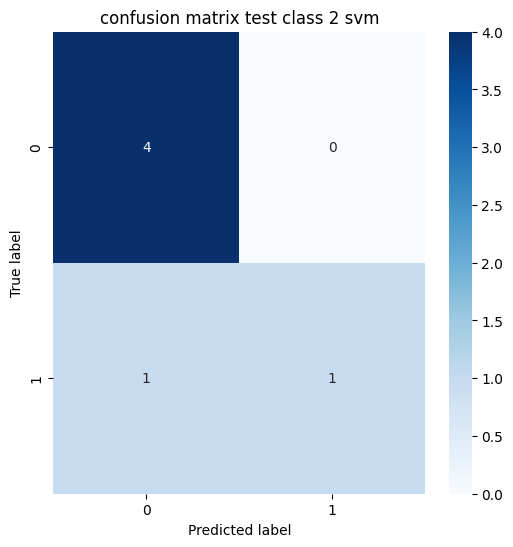

<ipython-input-9-68192264c9e0>:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,  cmap=plt.cm.Paired, edgecolors='k', marker='x', label='Test Data')


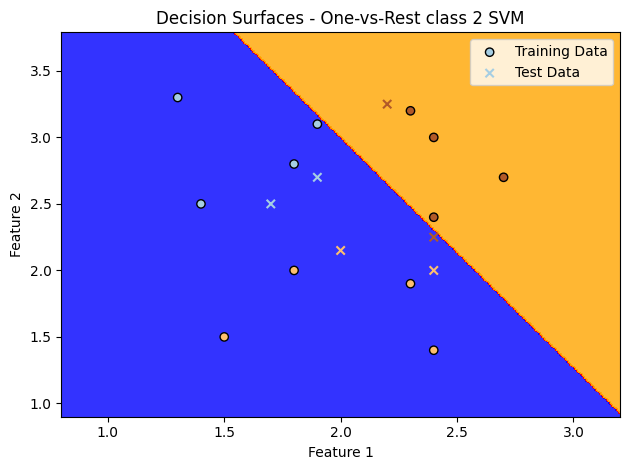

confusion matrix train class 2 svm: 100.00%
confusion matrix test class 2 svm: 83.33%


In [13]:
#Y_Train_2, Y_Test_2 = encode()

# Create and train the SVM classifier
svm_classifier_2=svm.SVC(kernel='linear')
svm_classifier_2.fit(X_Train, Y_Train_2)

    # Obtain predictions for training and test datasets
Y_Train_pred_2 = svm_classifier_2.predict(X_Train)
Y_Test_pred_2 = svm_classifier_2.predict(X_Test)

train_2_confusion_matrix = confusion_matrix(Y_Train_2,Y_Train_pred_2)
test_2_confusion_matrix = confusion_matrix(Y_Test_2,Y_Test_pred_2)
print(train_2_confusion_matrix)
print(test_2_confusion_matrix)
plot_confusion_matrix(train_2_confusion_matrix,'confusion matrix train class 2 svm')
plot_confusion_matrix(test_2_confusion_matrix,'confusion matrix test class 2 svm')
plot_fun(svm_classifier_2,'Decision Surfaces - One-vs-Rest class 2 SVM')
print('confusion matrix train class 2 svm: {:.2f}%'.format(getAccuracy(svm_classifier_2, X_Train,Y_Train_2)))
print('confusion matrix test class 2 svm: {:.2f}%'.format(getAccuracy(svm_classifier_2, X_Test,Y_Test_2)))


[[8 0]
 [0 4]]
[[2 2]
 [1 1]]


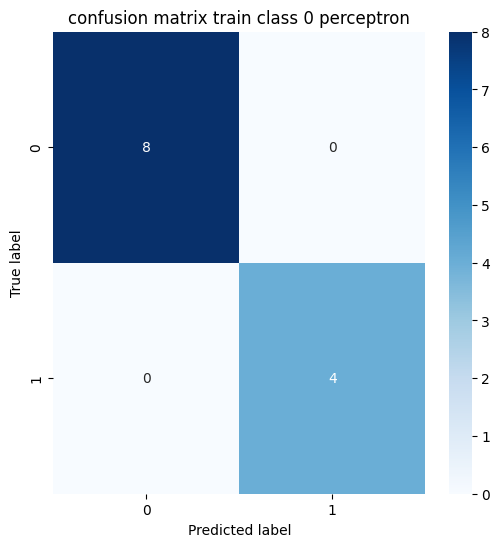

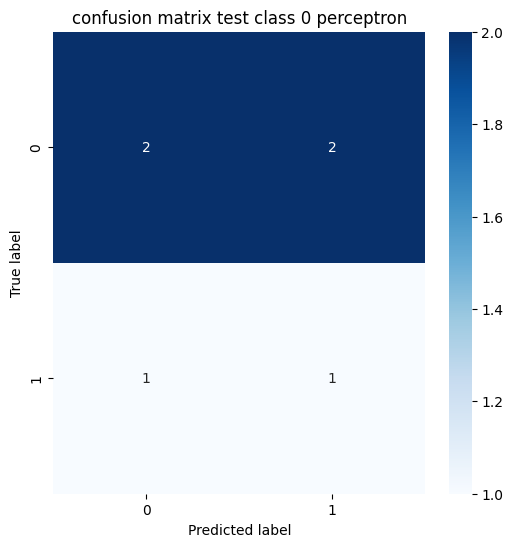

<ipython-input-9-68192264c9e0>:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,  cmap=plt.cm.Paired, edgecolors='k', marker='x', label='Test Data')


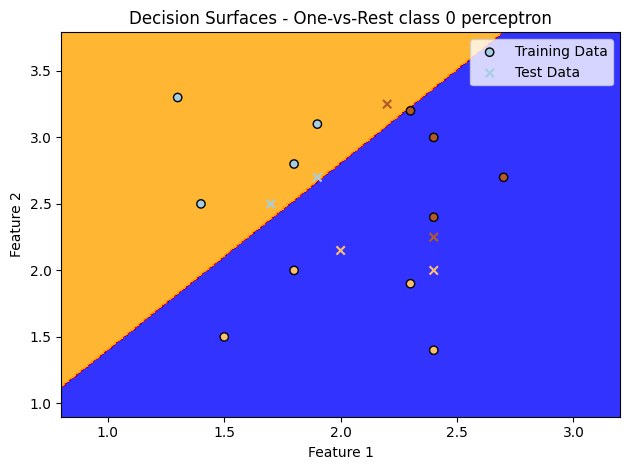

confusion matrix train class 0 perceptron: 100.00%
confusion matrix test class 0 perceptron: 66.67%


In [14]:
# Create and train the perceptron class0 classifier
perceptron_classifier_0 = Perceptron()
perceptron_classifier_0.fit(X_Train, Y_Train_0)
# Obtain predictions for training and test datasets
Y_Train_pred_p0 = perceptron_classifier_0.predict(X_Train)
Y_Test_pred_p0 = perceptron_classifier_0.predict(X_Test)

train_p0_confusion_matrix = confusion_matrix(Y_Train_0,Y_Train_pred_p0)
test_p0_confusion_matrix = confusion_matrix(Y_Test_2,Y_Test_pred_p0)
print(train_p0_confusion_matrix)
print(test_p0_confusion_matrix)
plot_confusion_matrix(train_p0_confusion_matrix,'confusion matrix train class 0 perceptron')
plot_confusion_matrix(test_p0_confusion_matrix,'confusion matrix test class 0 perceptron')

plot_fun(perceptron_classifier_0 ,'Decision Surfaces - One-vs-Rest class 0 perceptron')
print('confusion matrix train class 0 perceptron: {:.2f}%'.format(getAccuracy(perceptron_classifier_0, X_Train, Y_Train_0)))
print('confusion matrix test class 0 perceptron: {:.2f}%'.format(getAccuracy(svm_classifier_0, X_Test,Y_Test_0)))

[[8 0]
 [1 3]]
[[4 0]
 [1 1]]


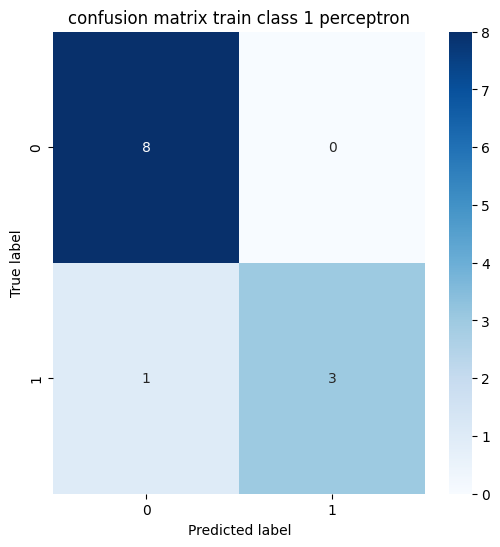

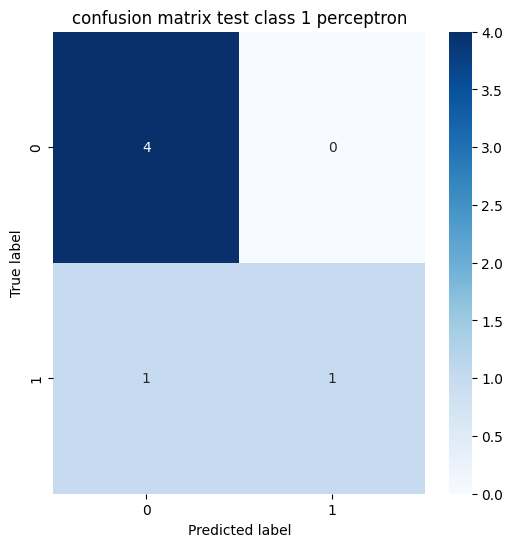

<ipython-input-9-68192264c9e0>:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,  cmap=plt.cm.Paired, edgecolors='k', marker='x', label='Test Data')


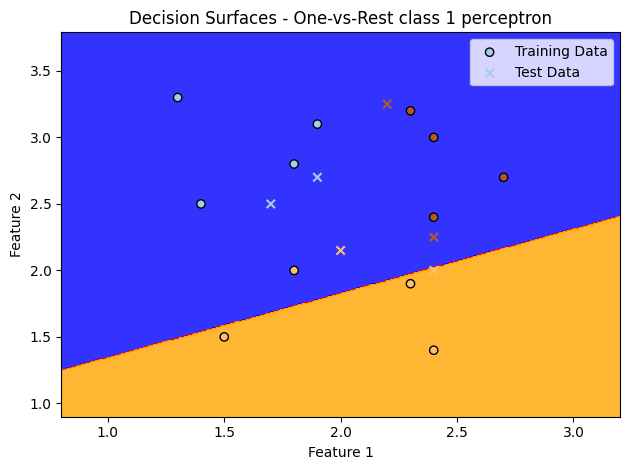

confusion matrix train class 1 perceptron: 91.67%
confusion matrix test class 1 perceptron: 83.33%


In [15]:
# Create and train the perceptron class1 classifier
perceptron_classifier_1 = Perceptron()
perceptron_classifier_1.fit(X_Train, Y_Train_1)
# Obtain predictions for training and test datasets
Y_Train_pred_p1 = perceptron_classifier_1.predict(X_Train)
Y_Test_pred_p1 = perceptron_classifier_1.predict(X_Test)
train_p1_confusion_matrix = confusion_matrix(Y_Train_1,Y_Train_pred_p1)
test_p1_confusion_matrix = confusion_matrix(Y_Test_1,Y_Test_pred_p1)

print(train_p1_confusion_matrix)
print(test_p1_confusion_matrix)
plot_confusion_matrix(train_p1_confusion_matrix,'confusion matrix train class 1 perceptron')
plot_confusion_matrix(test_p1_confusion_matrix,'confusion matrix test class 1 perceptron')

plot_fun(perceptron_classifier_1 ,'Decision Surfaces - One-vs-Rest class 1 perceptron')
print('confusion matrix train class 1 perceptron: {:.2f}%'.format(getAccuracy(perceptron_classifier_1, X_Train, Y_Train_1)))
print('confusion matrix test class 1 perceptron: {:.2f}%'.format(getAccuracy(svm_classifier_1, X_Test,Y_Test_1)))

[[0 8]
 [0 4]]
[[0 4]
 [0 2]]


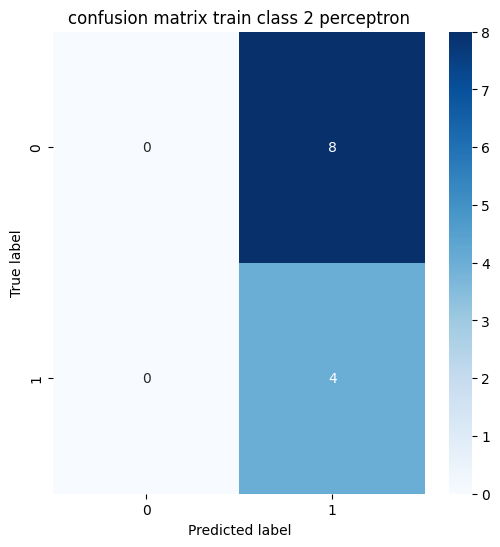

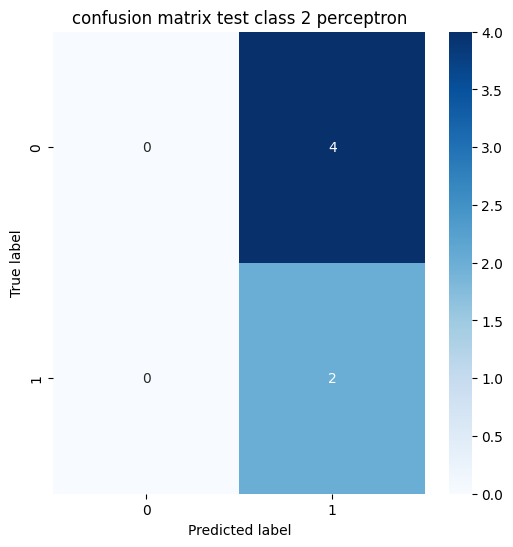

<ipython-input-9-68192264c9e0>:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,  cmap=plt.cm.Paired, edgecolors='k', marker='x', label='Test Data')


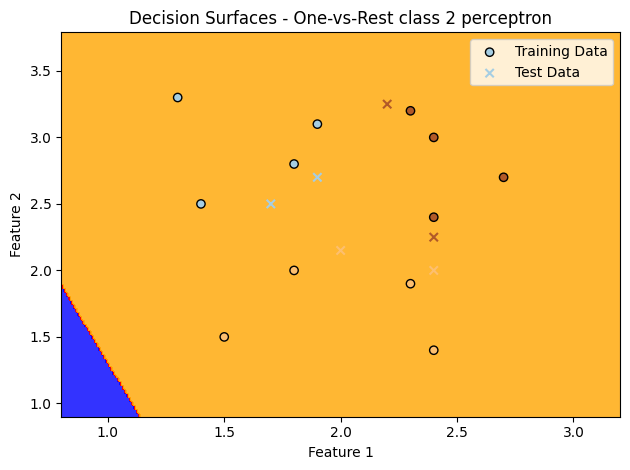

confusion matrix train class 2 perceptron: 33.33%
confusion matrix test class 2 perceptron: 83.33%


In [16]:
# Create and train the perceptron class2 classifier
perceptron_classifier_2 = Perceptron()
perceptron_classifier_2.fit(X_Train, Y_Train_2)
# Obtain predictions for training and test datasets
Y_Train_pred_p2 = perceptron_classifier_2.predict(X_Train)
Y_Test_pred_p2 = perceptron_classifier_2.predict(X_Test)

train_p2_confusion_matrix = confusion_matrix(Y_Train_2,Y_Train_pred_p2)
test_p2_confusion_matrix = confusion_matrix(Y_Test_2,Y_Test_pred_p2)

print(train_p2_confusion_matrix)
print(test_p2_confusion_matrix)
plot_confusion_matrix(train_p2_confusion_matrix,'confusion matrix train class 2 perceptron')
plot_confusion_matrix(test_p2_confusion_matrix,'confusion matrix test class 2 perceptron')

 

plot_fun(perceptron_classifier_2 ,'Decision Surfaces - One-vs-Rest class 2 perceptron')
print('confusion matrix train class 2 perceptron: {:.2f}%'.format(getAccuracy(perceptron_classifier_2, X_Train, Y_Train_2)))
print('confusion matrix test class 2 perceptron: {:.2f}%'.format(getAccuracy(svm_classifier_2, X_Test,Y_Test_2)))


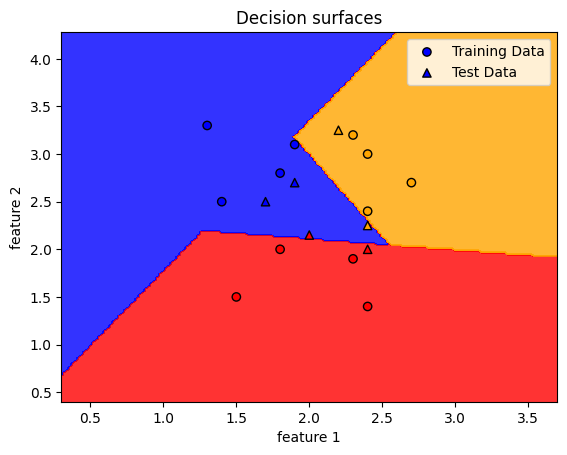

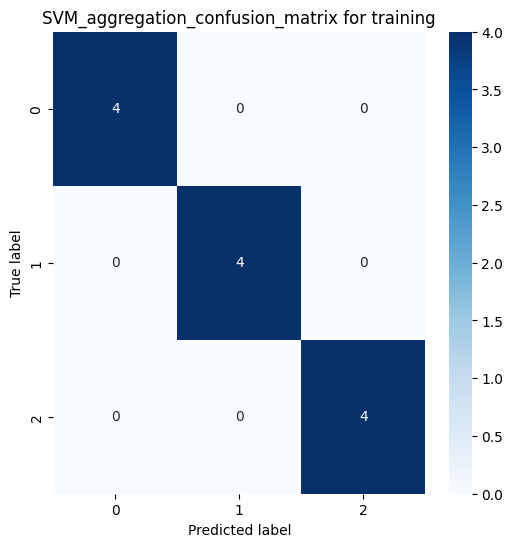

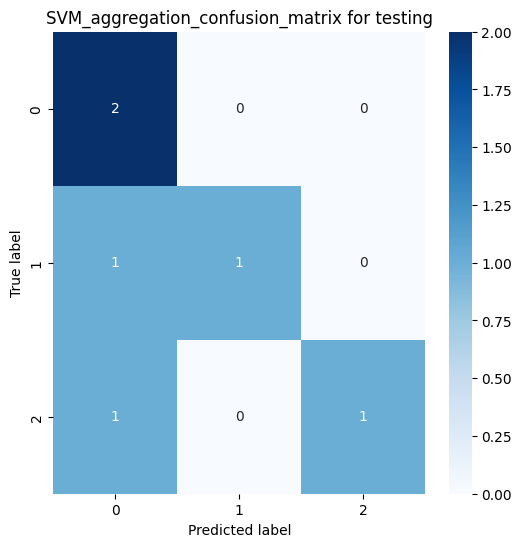

Training accuracy: 100.00%
Test accuracy: 66.67%


In [17]:
# Create a mesh grid to plot the decision boundary
h = 0.02
x_min, x_max = np.min(X_Train[:, 0]) - 1, np.max(X_Train[:, 0]) + 1
y_min, y_max = np.min(X_Train[:, 1]) - 1, np.max(X_Train[:, 1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

colors = ['blue', 'red', 'orange']
color_map = ListedColormap(colors)

# Predict the class labels for the mesh grid
Z0 = svm_classifier_0.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = svm_classifier_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = svm_classifier_2.predict(np.c_[xx.ravel(), yy.ravel()])

Z = np.argmax([Z0, Z1, Z2], axis=0)
Z = Z.reshape(xx.shape)




# Plot the decision boundaries and the data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=color_map)

# Scatter plot of training data
plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, cmap=color_map, edgecolors='k', marker='o', label='Training Data')

# Scatter plot of test data
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, cmap=color_map, edgecolors='k', marker='^', label='Test Data')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Decision surfaces')
plt.legend()
plt.show()

# Create a mesh grid to plot the decision boundary


train_predictions = np.argmax([svm_classifier_0.predict(X_Train), svm_classifier_1.predict(X_Train), svm_classifier_2.predict(X_Train)], axis=0)
test_predictions = np.argmax([svm_classifier_0.predict(X_Test), svm_classifier_1.predict(X_Test), svm_classifier_2.predict(X_Test)], axis=0)

SVM_agg_confusion_matrix_train = confusion_matrix(Y_Train,train_predictions)
SVM_agg_confusion_matrix_test = confusion_matrix(Y_Test,test_predictions)

train_accuracy = np.mean(train_predictions == Y_Train) * 100
test_accuracy = np.mean(test_predictions == Y_Test) * 100
plot_confusion_matrix(SVM_agg_confusion_matrix_train,'SVM_aggregation_confusion_matrix for training')
plot_confusion_matrix(SVM_agg_confusion_matrix_test,'SVM_aggregation_confusion_matrix for testing')

print("Training accuracy: {:.2f}%".format(train_accuracy))
print("Test accuracy: {:.2f}%".format(test_accuracy))
 

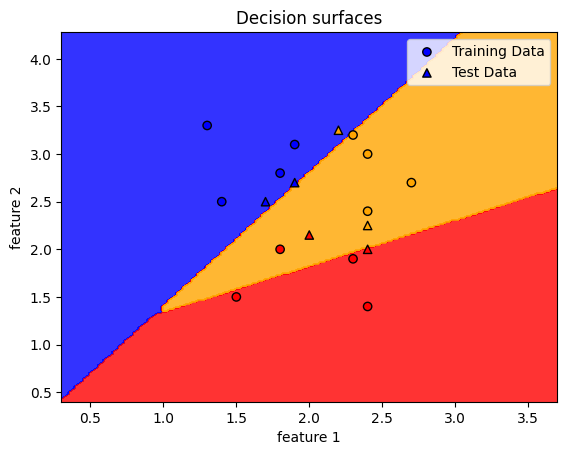

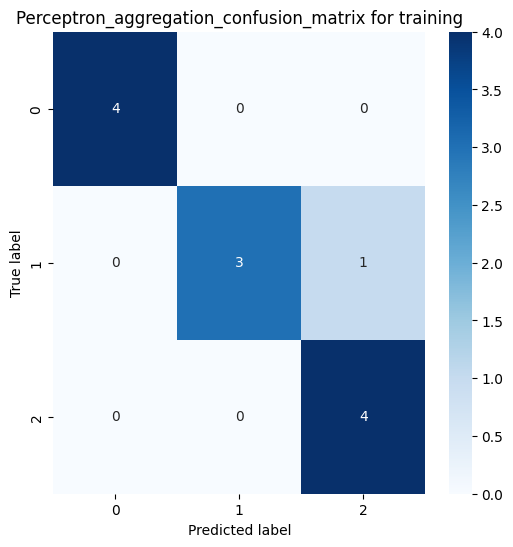

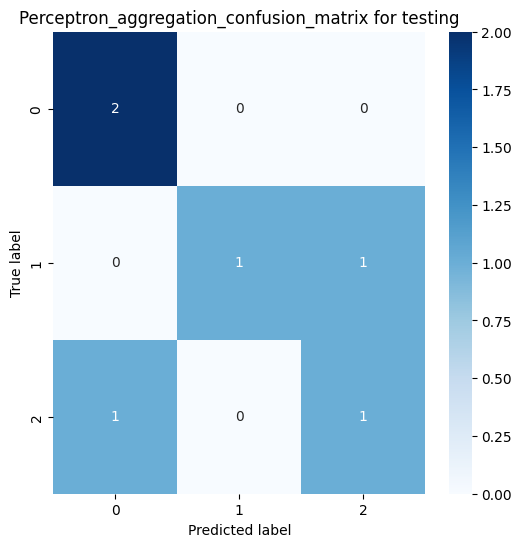

Training accuracy: 91.67%
Test accuracy: 66.67%


In [18]:
# Create a mesh grid to plot the decision boundary
h = 0.02
x_min, x_max = np.min(X_Train[:, 0]) - 1, np.max(X_Train[:, 0]) + 1
y_min, y_max = np.min(X_Train[:, 1]) - 1, np.max(X_Train[:, 1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

colors = ['blue', 'red', 'orange']
color_map = ListedColormap(colors)

# Predict the class labels for the mesh grid
Z0 = perceptron_classifier_0.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = perceptron_classifier_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = perceptron_classifier_2.predict(np.c_[xx.ravel(), yy.ravel()])

Z = np.argmax([Z0, Z1, Z2], axis=0)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=color_map)

# Scatter plot of training data
plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, cmap=color_map, edgecolors='k', marker='o', label='Training Data')

# Scatter plot of test data
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, cmap=color_map, edgecolors='k', marker='^', label='Test Data')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Decision surfaces')
plt.legend()
plt.show()


train_perceptron_predictions = np.argmax([perceptron_classifier_0 .predict(X_Train), perceptron_classifier_1 .predict(X_Train), perceptron_classifier_2 .predict(X_Train)], axis=0)
test_perceptron_predictions = np.argmax([perceptron_classifier_0 .predict(X_Test), perceptron_classifier_1 .predict(X_Test), perceptron_classifier_2.predict(X_Test)], axis=0)

per_agg_confusion_matrix_train = confusion_matrix(Y_Train,train_perceptron_predictions)
per_agg_confusion_matrix_test = confusion_matrix(Y_Test,test_perceptron_predictions)

train_perceptron_accuracy = np.mean(train_perceptron_predictions == Y_Train) * 100
test_perceptron_accuracy = np.mean(test_perceptron_predictions == Y_Test) * 100

plot_confusion_matrix(per_agg_confusion_matrix_train,'Perceptron_aggregation_confusion_matrix for training')
plot_confusion_matrix(per_agg_confusion_matrix_test,'Perceptron_aggregation_confusion_matrix for testing')

print("Training accuracy: {:.2f}%".format(train_perceptron_accuracy))
print("Test accuracy: {:.2f}%".format(test_perceptron_accuracy))

In [19]:
#create svm model with different parameters
clf2= svm.SVC(kernel='linear',C=1)
# Train the model
clf2.fit(X_Train,Y_Train)
Y_Train_Pred=clf2.predict(X_Train)
Y_Test_Pred=clf2.predict(X_Test) 

In [20]:
# Get the confusion matrices for training and test datasets
train2_confusion_matrix = confusion_matrix(Y_Train,Y_Train_Pred)
test2_confusion_matrix = confusion_matrix(Y_Test,Y_Test_Pred)

In [21]:
# Print the confusion matrices
print("Training confusion matrix:")
print(train2_confusion_matrix)
print("Test confusion matrix:")
print(test2_confusion_matrix)

Training confusion matrix:
[[3 0 1]
 [0 4 0]
 [0 0 4]]
Test confusion matrix:
[[2 0 0]
 [0 2 0]
 [0 0 2]]


In [22]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for training set
train2_accuracy = accuracy_score(Y_Train, Y_Train_Pred)

# Calculate accuracy for test set
test2_accuracy = accuracy_score(Y_Test, Y_Test_Pred)

# Print the accuracies
print("Training accuracy:", train2_accuracy)
print("Test accuracy:", test2_accuracy)

Training accuracy: 0.9166666666666666
Test accuracy: 1.0


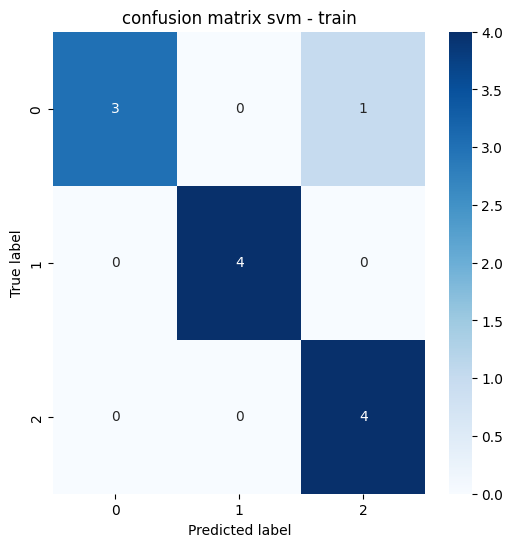

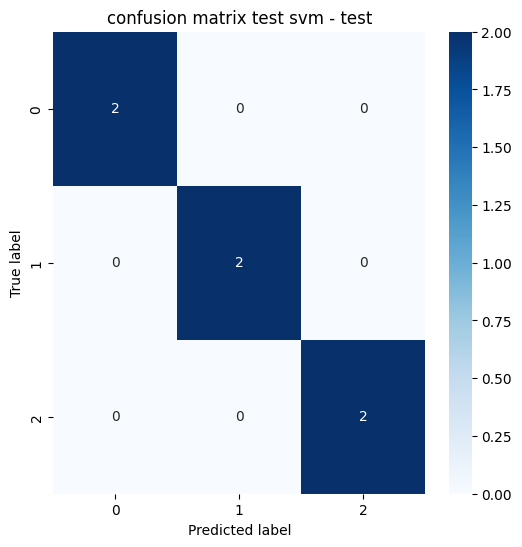

In [23]:
plot_confusion_matrix(train2_confusion_matrix,'confusion matrix svm - train')
plot_confusion_matrix(test2_confusion_matrix,'confusion matrix test svm - test')

<ipython-input-9-68192264c9e0>:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,  cmap=plt.cm.Paired, edgecolors='k', marker='x', label='Test Data')


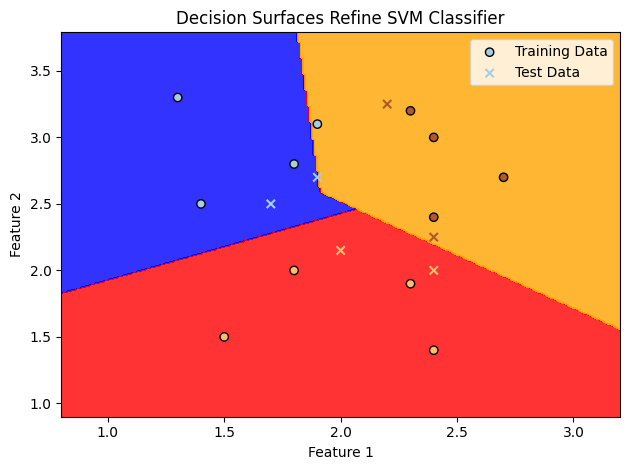

In [24]:
plot_fun(clf2,'Decision Surfaces Refine SVM Classifier')

 ## **K_neighbours**

In [25]:
#read the csv file and lebeling the column
# If utilising Google Colab, the data needs to be uploaded for handling.
data = pd.read_csv("/content/car_evaluation.csv",header=None)
data.columns = ['buying Price','maintenance cost','number of doors','number of persons','lug_boot','safety','decision']
data

,buying Price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [26]:
#shuffle the data
data_shuffled = data.sample(frac=1, random_state=42)
data_shuffled

,buying Price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
599,high,high,4,2,med,high,unacc
1201,med,low,2,4,med,med,acc
628,high,high,5more,2,big,med,unacc
1498,low,high,5more,4,med,med,acc
1263,med,low,4,more,med,low,unacc
...,...,...,...,...,...,...,...
1130,med,med,3,more,med,high,vgood
1294,med,low,5more,more,big,med,good
860,high,low,5more,more,med,high,acc
1459,low,high,4,2,small,med,unacc


In [27]:
X = data.iloc[:, :-1]  
y = data.iloc[:, -1] 

In [28]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, test_size=428, random_state=42)
X_train,X_val,Y_train,Y_val=train_test_split(X_train_val,Y_train_val,train_size=1000,random_state=42)
#printing the shape
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1000, 6)
Validation set shape: (300, 6)
Testing set shape: (428, 6)


In [29]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode string columns to numerical values

Y_train = label_encoder.fit_transform(Y_train)
Y_val = label_encoder.transform(Y_val)
Y_test = label_encoder.transform(Y_test)


for column in ['buying Price', 'maintenance cost', 'number of doors', 'number of persons', 'lug_boot', 'safety']:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_val[column] = label_encoder.transform(X_val[column])
    X_test[column] = label_encoder.transform(X_test[column])

Validation accuracy for  0.1      0.6233333333333333
Test       accuracy for  0.1      0.6378504672897196
Validation accuracy for  0.2      0.6666666666666666
Test       accuracy for  0.2      0.6822429906542056
Validation accuracy for  0.3      0.7266666666666667
Test       accuracy for  0.3      0.7009345794392523
Validation accuracy for  0.4      0.7866666666666666
Test       accuracy for  0.4      0.6985981308411215
Validation accuracy for  0.5      0.7733333333333333
Test       accuracy for  0.5      0.7266355140186916
Validation accuracy for  0.6      0.79
Test       accuracy for  0.6      0.6915887850467289
Validation accuracy for  0.7      0.78
Test       accuracy for  0.7      0.7079439252336449
Validation accuracy for  0.8      0.74
Test       accuracy for  0.8      0.6845794392523364
Validation accuracy for  0.9      0.77
Test       accuracy for  0.9      0.6939252336448598
Validation accuracy for  1.0      0.7566666666666667
Test       accuracy for  1.0      0.7219626168224

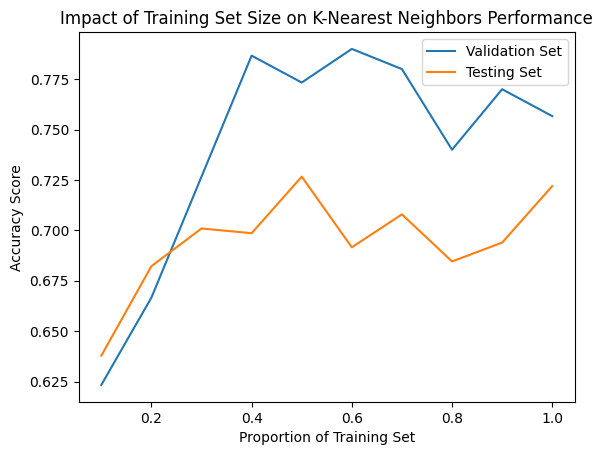

In [30]:
validation_scores = []
testing_scores = []

# Define the list of training set proportions
training_proportions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for proportion in training_proportions:
    # Calculate the number of training samples based on the proportion
    num_train_samples = int(proportion * len(X_train))
    knn = KNeighborsClassifier(n_neighbors=2)
    
    # Train the classifier using the specified number of training samples
    knn.fit(X_train[:num_train_samples], Y_train[:num_train_samples])
    # Predict labels for validation set and calculate accuracy
    val_predictions = knn.predict(X_val)
    val_accuracy = accuracy_score(Y_val, val_predictions)
    validation_scores.append(val_accuracy)
    print('Validation accuracy for ',proportion,'    ',val_accuracy)
    
    # Predict labels for testing set and calculate accuracy
    test_predictions = knn.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_predictions)
    testing_scores.append(test_accuracy)
    print('Test       accuracy for ',proportion,'    ',test_accuracy)

plt.plot(training_proportions, validation_scores, label='Validation Set')
plt.plot(training_proportions, testing_scores, label='Testing Set')
plt.xlabel('Proportion of Training Set')
plt.ylabel('Accuracy Score')
plt.title('Impact of Training Set Size on K-Nearest Neighbors Performance')
plt.legend()
plt.show()

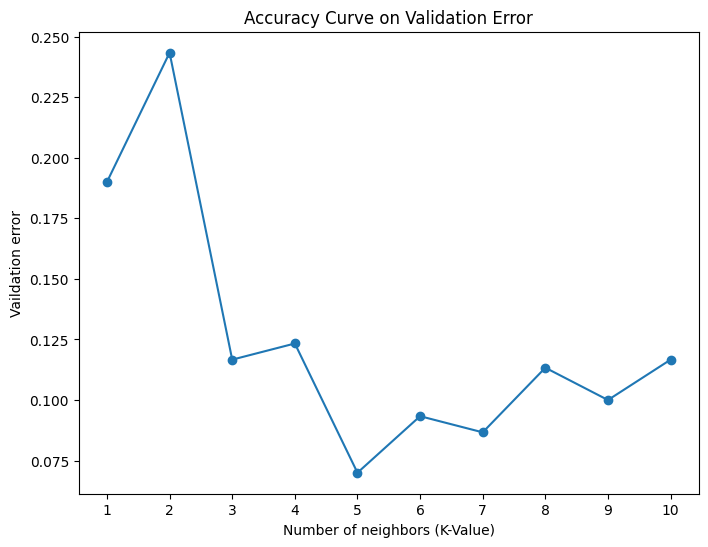

In [31]:
k_values = np.arange(1, 11)  # K values from 1 to 10
accuracy_scores = []
error=[]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, Y_train)
    accuracy = knn.score(X_val, Y_val)
    accuracy_scores.append(accuracy)
    error.append(1-accuracy)
plt.figure(figsize=(8, 6))
plt.plot(k_values, error, marker='o')
plt.xlabel('Number of neighbors (K-Value)')
plt.ylabel('Vaildation error')
plt.title('Accuracy Curve on Validation Error')
plt.xticks(k_values)
plt.show()

# ***Impact of Number of Training Samplest***
By varying the number of training samples from 10% to 100% of the training set, we observed the following:


1.   As the number of training samples increased, the accuracy scores on both 
     the validation and testing sets generally improved.
     
2.   With a small number of training samples the model may not have enough data 
     to learn meaningful patterns, leading to lower accuracy scores.   

3.   there might be a point of diminishing returns, where adding more training 
     samples does not significantly improve the model's performance.

##***Finding the best K value***
By varying the number of  K_value from 1 to 10 of, we observed the following:
1. The rise in K_value was generally accompanied by a decrease in validation error.
2. The best accuracy was observed when the value equaled 5, which had the fewest validation errors.